# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url + city).json()
       


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather ['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

     #pause to avoid rate limiting
    time.sleep(1)

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad altamirano
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | barcelos
Processing Record 4 of Set 1 | nurota
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | glace bay
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | guerrero negro
Processing Record 13 of Set 1 | yamada
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | pokhvistnevo
Processing Record 18 of Set 1 | dryden
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | waitangi
Proc

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [28]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad altamirano,18.3167,-100.6500,23.69,80,27,0.89,MX,1728695103
1,adamstown,-25.0660,-130.1015,21.48,85,49,4.63,PN,1728695104
2,barcelos,41.5388,-8.6151,16.99,95,67,4.50,PT,1728695106
3,nurota,40.5614,65.6886,11.20,54,99,0.88,UZ,1728695107
4,constantia,44.1833,28.6500,19.38,84,100,7.31,RO,1728694837


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad altamirano,18.3167,-100.6500,23.69,80,27,0.89,MX,1728695103
1,adamstown,-25.0660,-130.1015,21.48,85,49,4.63,PN,1728695104
2,barcelos,41.5388,-8.6151,16.99,95,67,4.50,PT,1728695106
3,nurota,40.5614,65.6886,11.20,54,99,0.88,UZ,1728695107
4,constantia,44.1833,28.6500,19.38,84,100,7.31,RO,1728694837


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

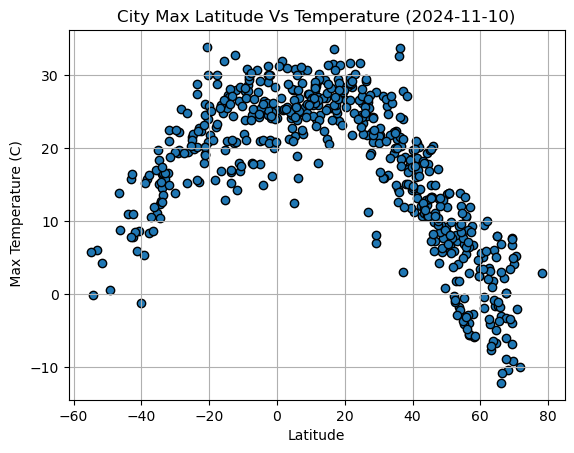

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolors='black')


# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature (2024-11-10)")
plt.ylabel(" Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()


#### Latitude Vs. Humidity

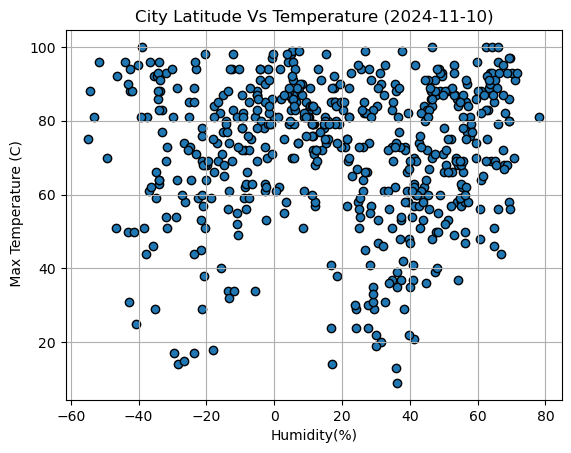

In [32]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Temperature (2024-11-10)")
plt.ylabel(" Max Temperature (C)")
plt.xlabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

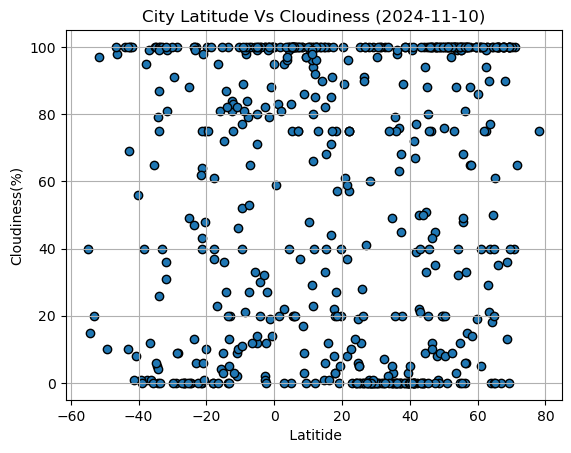

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (2024-11-10)")
plt.xlabel(" Latitide")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

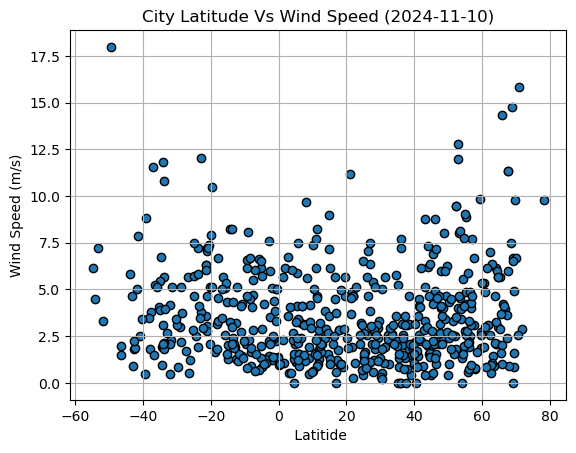

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",edgecolors='black')


# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (2024-11-10)")
plt.xlabel(" Latitide")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()




---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Get regression values
    regress_values = x_values * slope + intercept
    return slope, intercept, rvalue, pvalue, stderr, regress_values

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad altamirano,18.3167,-100.6500,23.69,80,27,0.89,MX,1728695103
2,barcelos,41.5388,-8.6151,16.99,95,67,4.50,PT,1728695106
3,nurota,40.5614,65.6886,11.20,54,99,0.88,UZ,1728695107
4,constantia,44.1833,28.6500,19.38,84,100,7.31,RO,1728694837
6,kodiak,57.7900,-152.4072,6.73,76,100,3.09,US,1728695110


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.48,85,49,4.63,PN,1728695104
5,blackmans bay,-43.0167,147.3167,15.85,50,10,0.89,AU,1728695109
7,margaret river,-33.9500,115.0667,16.48,63,26,5.69,AU,1728695111
9,port-aux-francais,-49.3500,70.2167,0.55,70,10,17.98,TF,1728695068
15,grytviken,-54.2811,-36.5092,-0.07,88,15,4.47,GS,1728695121


###  Temperature vs. Latitude Linear Regression Plot

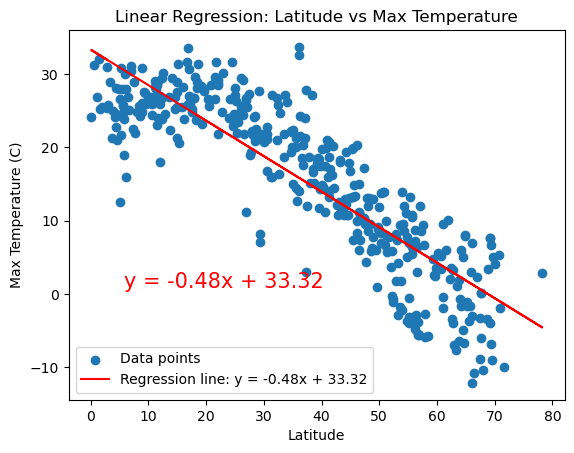

The r-squared is: 0.7567244332415358


In [39]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression: Latitude vs Max Temperature')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

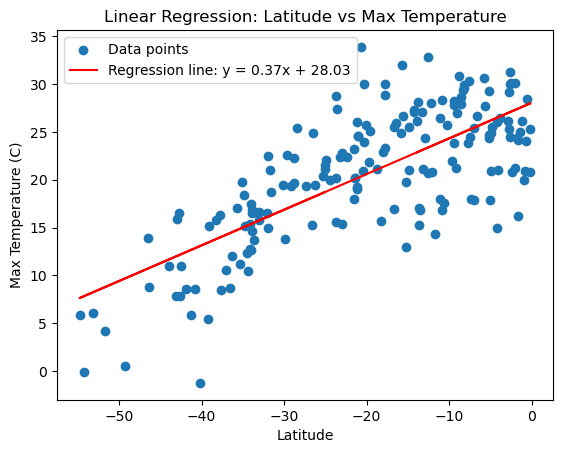

The r-squared is: 0.546192300013392


In [40]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Linear Regression: Latitude vs Max Temperature')

# Add legend
plt.legend()

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** 
Northern Hemisphere:
Higher Latitudes (closer to the poles): As latitude increases (moving towards the North Pole, i.e., beyond 30°N, 50°N, etc.), temperatures generally decrease. This is because higher latitudes receive less direct sunlight throughout the year, especially in winter.
Lower Latitudes (closer to the equator): As latitude decreases (moving towards the equator, i.e., from 0° to 30°N), temperatures increase. The equatorial region receives more direct sunlight year-round, leading to consistently warmer temperatures.

Southern Hemisphere:
The pattern in the Southern Hemisphere is the reverse in terms of geographic orientation but follows the same principle:
Higher Latitudes (closer to the South Pole): As latitude increases (moving towards the South Pole, i.e., from -30°S, -50°S, etc.), temperatures decrease. Again, higher latitudes in the Southern Hemisphere receive less direct sunlight, especially during their winter months.
Lower Latitudes (closer to the equator): As latitude decreases (moving towards the equator, i.e., from -30°S to 0°), temperatures increase, as areas near the equator experience more direct sunlight

### Humidity vs. Latitude Linear Regression Plot

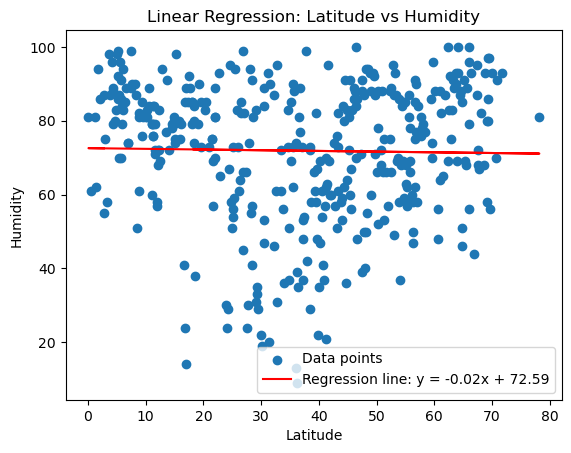

The r-squared is: 0.00040180983518152457


In [41]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Linear Regression: Latitude vs Humidity')

# Add legend
plt.legend()

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

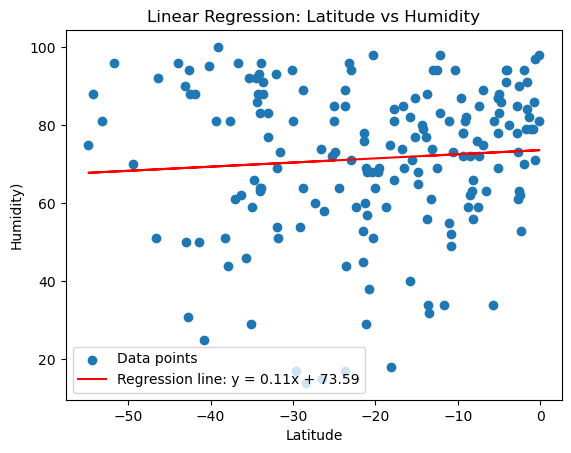

The r-squared is: 0.005765563232671262


In [42]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.title('Linear Regression: Latitude vs Humidity')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** 
The r² value of approximately 0.0004 for the Northern Hemisphere indicates that there is a very weak relationship between humidity and latitude. This means that latitude accounts for only about 0.04% of the variation in humidity in the Northern Hemisphere.
The r² value of approximately 0.0058 for the Southern Hemisphere also indicates a very weak relationship between humidity and latitude. This means that latitude accounts for about 0.58% of the variation in humidity in the Southern Hemisphere.

Interpretation:
Weak Correlation: The low r² value suggests that changes in latitude do not significantly predict changes in humidity. Other factors may influence humidity levels more strongly than latitude in this region.

### Cloudiness vs. Latitude Linear Regression Plot

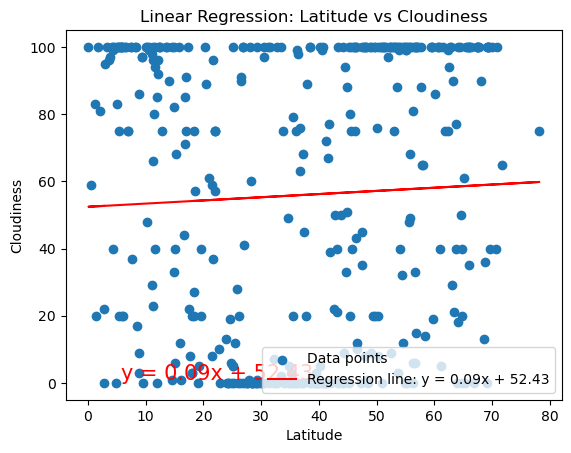

The r-squared is: 0.0019956530086685503


In [43]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs Cloudiness')


plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

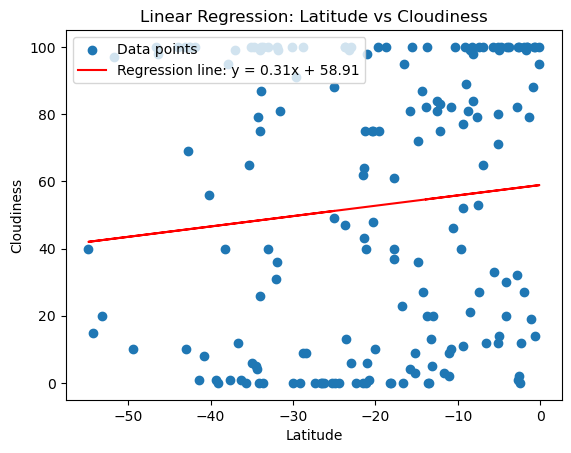

The r-squared is: 0.011075520649326433


In [48]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Linear Regression: Latitude vs Cloudiness')



# Add legend
plt.legend()

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** 
The r² value of approximately 0.0111 for the Southern Hemisphere indicates a slightly stronger, yet still weak, relationship between cloudiness and latitude compared to the Northern Hemisphere. This means that latitude accounts for about 1.11% of the variation in cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

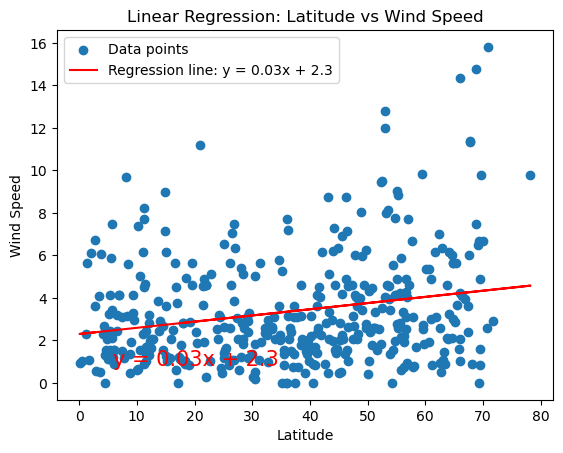

The r-squared is: 0.050630738864260304


In [49]:
# Northern Hemisphere
x_values=northern_hemi_df['Lat']
y_values=northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Latitude vs Wind Speed')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")

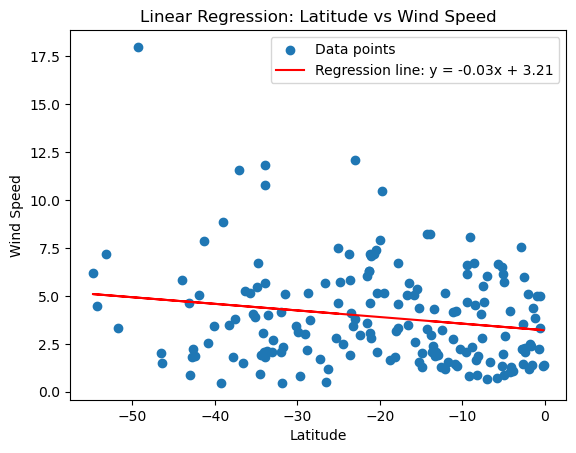

The r-squared is: 0.03279431230867194


In [51]:
# Southern Hemisphere
x_values=southern_hemi_df['Lat']
y_values=southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr, regress_values = linear_regression(x_values,y_values)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points
plt.scatter(x_values, y_values, label='Data points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label=f'Regression line: {line_eq}')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression: Latitude vs Wind Speed')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Add legend
plt.legend()

# Show the plot
plt.show()

print(f"The r-squared is: {rvalue**2}")



**Discussion about the linear relationship:** 
Northern Hemisphere: The r² value of approximately 0.0506 indicates a weak but relatively stronger relationship compared to the previous analyses (humidity and cloudiness). This suggests that latitude accounts for about 5.06% of the variation in wind speed in the Northern Hemisphere.

Southern Hemisphere: The r² value of approximately 0.0328 indicates a weak relationship as well, with latitude accounting for about 3.28% of the variation in wind speed in the Southern Hemisphere